In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords

In [3]:
dt = pd.read_csv('imdb_labelled.txt', delimiter = '\t', names=['review', 'rating'])
dt.info()
dt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  748 non-null    object
 1   rating  748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


,review,rating
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
dt['length'] = dt['review'].apply(lambda x: len(str(x).split(' ')))
dt

,review,rating,length
0,"A very, very, very slow-moving, aimless movie ...",0,15
1,Not sure who was more lost - the flat characte...,0,21
2,Attempting artiness with black & white and cle...,0,33
3,Very little music or anything to speak of.,0,10
4,The best scene in the movie was when Gerardo i...,1,23
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,13
744,"Unfortunately, any virtue in this film's produ...",0,16
745,"In a word, it is embarrassing.",0,8
746,Exceptionally bad!,0,4


In [5]:
dt['length'].unique()

array([  15,   21,   33,   10,   23,   22,    5,   17,   12,    8,   13,
          6,   18,   25,   19,  868,   14,   16,    9,    7,   26,   35,
         11,    4,   27,   28,    3,   20,   37,   24,   36,  201, 1393,
         49,   30,  306,   31,   32,   44,   56,   45,   34,   38,   64,
         58,   40,   47,   29,   73,   41,   39,   55,   53,   42,  800],
      dtype=int64)

In [6]:
X = dt['review']
y = dt['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .40, random_state = 60)
X_train.shape, X_train.to_list()[:10]

((448,),
 ['I am so tired of clichés that is just lazy writing, and here they come in thick and fast.  ',
  'Nothing short of magnificent photography/cinematography in this film.  ',
  'The acting was bad, the dialogs were extremely shallow and insincere.  ',
  "The soundtrack wasn't terrible, either.  ",
  'Much more interesting, more action, more suspense, and less of the unneeded controversy.  ',
  "Feelings, thoughts...Gabriel's discomfort during the dance...all these intangibles leap to life and come within the viewer's grasp in Huston's portrayal.  ",
  ' With great sound effects, and impressive special effects, I can\'t recommend this movie enough.  \t1\nCall me a nut, but I think this is one of the best movies ever.  \t1\nGreat character actors Telly Savalas and Peter Boyle.  \t1\n1 hour 54 minutes of sheer tedium, melodrama and horrible acting, a mess of a script, and a sinking feeling of GOOD LORD, WHAT WERE THEY THINKING?  \t0\nLots of holes in the script.  \t0\nIt\'s like a

In [7]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(X_train)

tfidf_df = pd.DataFrame(data=tfidf.toarray().astype(float), columns=tfidf_vectorizer.get_feature_names())

tfidf_df["__labels__"] = y_train.values
tfidf_df.head()

,10,15pm,17,1947,1948,1949,1980,1986,1995,1998,...,you,young,younger,your,yourself,youtube,zillion,zombie,zombiez,__labels__
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [8]:
from collections import Counter
voc = Counter(tfidf_vectorizer.get_feature_names())
voc.most_common(10)

[('10', 1),
 ('15pm', 1),
 ('17', 1),
 ('1947', 1),
 ('1948', 1),
 ('1949', 1),
 ('1980', 1),
 ('1986', 1),
 ('1995', 1),
 ('1998', 1)]

In [9]:
word = 'many'
xv = tfidf_df[tfidf_df['__labels__']== 1][word]
xv.sort_values(ascending=False)

115    0.363922
9      0.238444
381    0.227924
248    0.196250
111    0.189997
         ...   
295    0.000000
294    0.000000
293    0.000000
292    0.000000
1      0.000000
Name: many, Length: 241, dtype: float64

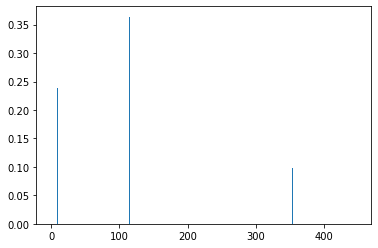

In [10]:
from matplotlib import pyplot as plt

plt.bar(xv.index, xv.values)
plt.show()

In [11]:
vectorization = Pipeline([
    ('bow',CountVectorizer(stop_words = 'english')),
    ('tfidf',TfidfTransformer()),
    ('classifier',BernoulliNB())
])

In [12]:
model = vectorization.fit(X_train, y_train)
pred = model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       155
           1       0.89      0.57      0.69       145

    accuracy                           0.76       300
   macro avg       0.79      0.75      0.75       300
weighted avg       0.79      0.76      0.75       300



In [14]:
accuracy = []

stratifiedKf_pred = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
stratifiedKf_pred.get_n_splits(X, y)

for train_index, test_index in stratifiedKf_pred.split(X, y):
    X_train1, X_test1 = X.iloc[train_index], X.iloc[test_index]
    y_train1, y_test1 = y.iloc[train_index], y.iloc[test_index]
    
    vectorization.fit(X_train1, y_train1)
    result = vectorization.score(X_test1, y_test1)
    accuracy.append(result)
    
accuracy = np.array(accuracy)
print(accuracy)
print(f"mean_accuracy = {accuracy.mean():.4f}, std_accuracy = {accuracy.std():.4f}")

[0.78666667 0.76       0.71333333 0.72483221 0.70469799]
mean_accuracy = 0.7379, std_accuracy = 0.0308
